# Imports

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import sys
# sys.path.append('../ClusterPlot')
sys.path.append('./utils')

import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from DataSetFactory import DataSetFactory
from ClusterPlot_understand import ClusterPlot

In [7]:
RANDOM_STATE = 42
ds = DataSetFactory.get_dataset('hourglass2', random_state=RANDOM_STATE, sample=None, is_subset=False)
ds.df
ds.label_col

,X,Y,Z,Poly
0,2.664885,0.849356,-0.046342,0
1,1.608484,2.099026,-0.046573,0
2,1.863890,1.164917,-0.101283,0
3,1.584289,1.465447,0.031425,0
4,2.368466,1.760610,-0.029169,0
...,...,...,...,...
15,6.083836,1.820734,-0.010797,1
16,5.546064,1.809470,-0.000681,1
17,6.000483,2.076545,0.003640,1
18,5.579746,2.341622,0.006056,1


'Poly'

# 3D Plot

In [30]:
# input: ds  output: 3d diagram
%matplotlib notebook

def vis_3d_clusters(ds,df,size=100,show_label=False):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    feature_col = ds.feature_cols
#     df = ds.df
    #     x = df[feature_col]
    label = ds.label_col
    y = df[label]
    cluster_label = y.unique()
    for i in cluster_label:
        cluster_df = df[df[label]==i]
        cluster = df[df[label]==i][feature_col].values
        cluster.shape
        ax.scatter(*cluster.T, s=size, alpha=0.6, edgecolors='w')
        if show_label:
            for j, anchor_i in enumerate(cluster_df.index):
                ax.text(*cluster[j].T,
                f'{anchor_i}',
                horizontalalignment='center', size='medium',
                color='black', weight='semibold')
    return ax 

<IPython.core.display.Javascript object>


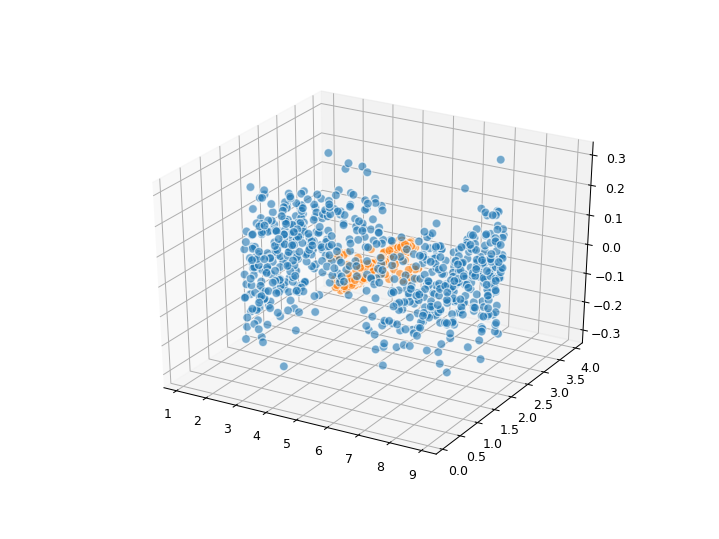

In [31]:
df = ds.df
ax_3d = vis_3d_clusters(ds,df,50)

In [10]:

# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# xs = ds.df[ds.df[ds.label_col] == 0]['X']
# ys = ds.df[ds.df[ds.label_col] == 0]['Y']
# zs = ds.df[ds.df[ds.label_col] == 0]['Z']
# ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

# xs = ds.df[ds.df[ds.label_col] == 1]['X']
# ys = ds.df[ds.df[ds.label_col] == 1]['Y']
# zs = ds.df[ds.df[ds.label_col] == 1]['Z']
# ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

# # remove ticks
# ax = plt.gca()
# ax.xaxis.set_ticklabels([])
# ax.yaxis.set_ticklabels([])
# ax.zaxis.set_ticklabels([])

# for line in ax.xaxis.get_ticklines():
#     line.set_visible(False)
# for line in ax.yaxis.get_ticklines():
#     line.set_visible(False)
# for line in ax.zaxis.get_ticklines():
#     line.set_visible(False)

# ax.view_init(elev=60, azim=60)

## plt.show()

In [11]:
X = ds.df[ds.feature_cols].values
y = ds.df[ds.label_col].values
X.shape, y.shape
ds.class_to_label

((940, 3), (940,))

{0: 'Poly0', 1: 'Poly1'}

# Cluster Plots

In [12]:
# %matplotlib inline
blobs_cp = ClusterPlot(reduce_all_points=True,
                  n_iter=1, 
                  batch_size=0,
                  learning_rate=0.1,
                  dataset='Hourglass2',
                  class_to_label=ds.class_to_label,
                  show_fig=True,
                  save_fig=False,
                  random_state=RANDOM_STATE,
                  show_inner_blobs=True,
                  show_blobs=True,
                  show_label_level_plots=False,
                  show_anchor_level_plot=False,
                  birch_threshold=0.42,
                  alpha=0.8,
                  douglas_peucker_tolerance= 0,
                  smooth_iter=3,
                  magnitude_step=False,
                  show_loss_plot=False,
                  show_anchors=True,
                  show_anchors_annotation=True,
                  show_points=True,
                  uniform_points_per='label',
                  point_margin = 0.001,
                      )

2021-11-05 10:43:16,026 - ClusterPlot-18645 - INFO - finding intra class anchors using birch
2021-11-05 10:43:16,210 - ClusterPlot-18645 - INFO - UnSupervised Dim Reduction
2021-11-05 10:43:16,212 - ClusterPlot-18645 - INFO - Dim Reduction all points
2021-11-05 10:43:28,389 - ClusterPlot-18645 - INFO - Starting iteration 1 loss = 0.18290882244370615


<IPython.core.display.Javascript object>


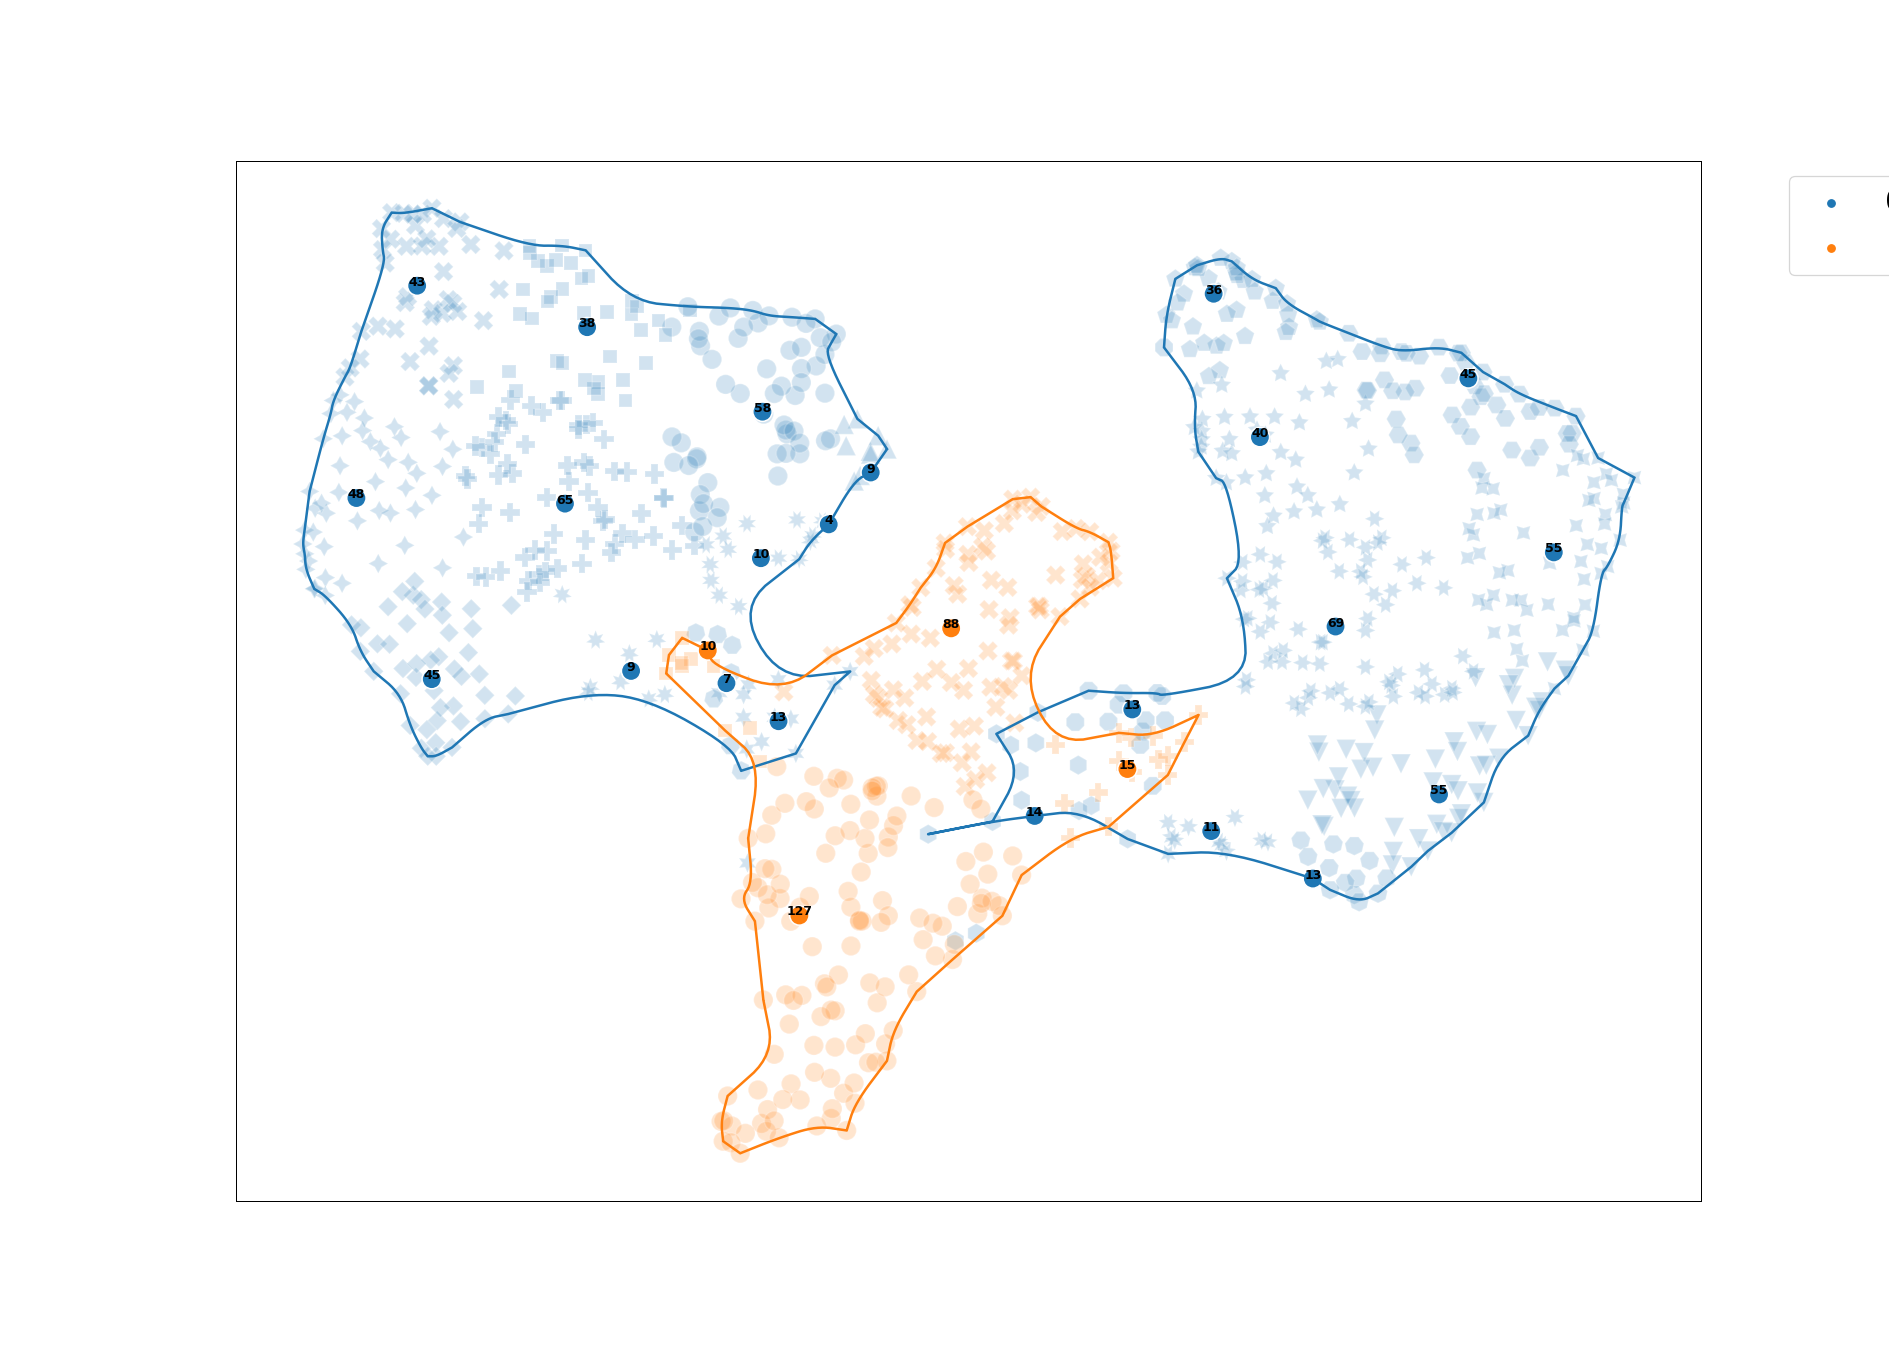

<IPython.core.display.Javascript object>


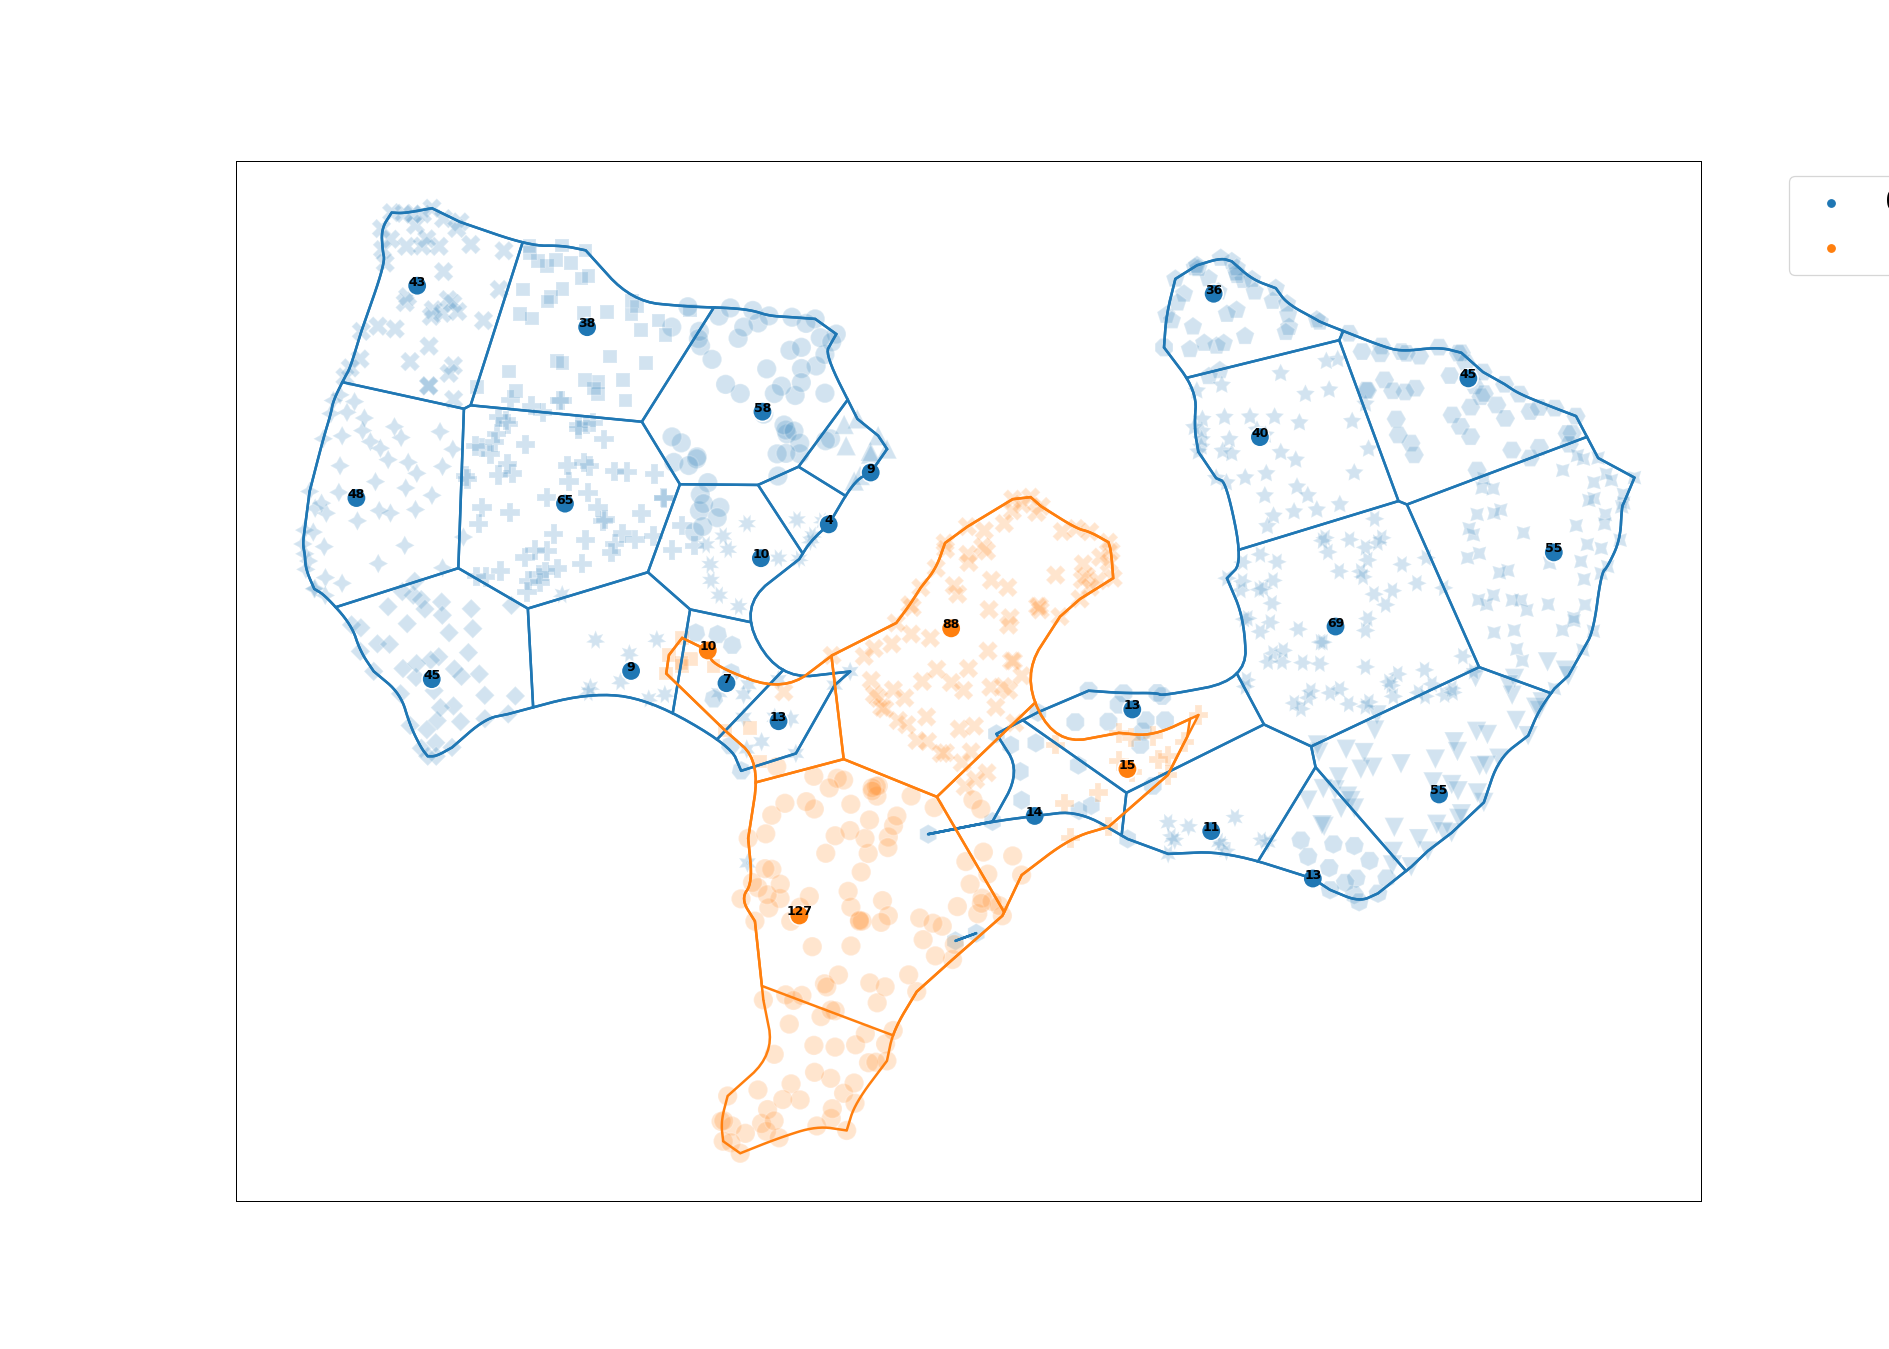

In [13]:
low_dim_blobs_cp = blobs_cp.fit_transform(X, y)

# Birch - Cplot

In [14]:
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#ff0000','#00ff00','#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y) + 1))))
anchors = blobs_cp.intra_class_anchors
anchors_label = blobs_cp.intra_class_anchors_labels
ax_3d.scatter(*anchors.T,s=100,color=colors[anchors_label])
anchors_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1], dtype=int64)

In [19]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*anchors.T, s=100, alpha=0.6, edgecolors='w',color=colors[anchors_label])

In [39]:
blobs_cp.low_dim_points

array([[ 1.2970456, 12.499307 ],
       [-6.631256 , 14.645708 ],
       [-2.2825727, 14.859141 ],
       ...,
       [ 4.7144046,  6.66725  ],
       [-0.6169542,  6.113488 ],
       [ 8.574405 ,  3.1443079]], dtype=float32)

# Agglomerative Clustering

In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors.nearest_centroid import NearestCentroid
# Agg_X = ds.df[ds.feature_cols].values
# Agg_clusters = AgglomerativeClustering(n_clusters=None,distance_threshold=3).fit(Agg_X)


In [33]:
def cm_methonds(cm,ds):
    label = ds.label_col
    y = ds.df[label]
    cluster_label = y.unique()
    newDf = pd.DataFrame(columns=ds.df.columns)
    for i in cluster_label:
        tmpDf = pd.DataFrame(columns=ds.df.columns)
        feature_col = ds.feature_cols
        label = ds.label_col
        cluster_X = df[df[label]==i][feature_col].values
        sub_clusters = cm.fit(cluster_X)
    #     sub_clusters.n_clusters_
        clf = NearestCentroid()
        clf.fit(cluster_X,sub_clusters.labels_)
        centroid = clf.centroids_
        tmpDf[label] = i
        tmpDf[feature_col] = centroid
        tmpDf[label] = i
    #     centroid
        newDf = newDf.append(tmpDf)
    return newDf

In [22]:
def cm_methonds(cm,ds,name="no"):
    label = ds.label_col
    y = ds.df[label]
    cluster_label = y.unique()
    newDf = pd.DataFrame(columns=ds.df.columns)
    for i in cluster_label:
        tmpDf = pd.DataFrame(columns=ds.df.columns)
        feature_col = ds.feature_cols
        label = ds.label_col
        cluster_X = df[df[label]==i][feature_col].values
#         cm_agglomeratve = AgglomerativeClustering(n_clusters=None,distance_threshold=1).fit(cluster_X)
    #     cm.n_clusters_
        clf = NearestCentroid()
        clf.fit(cluster_X,cm.labels_)
        centroid = clf.centroids_
        tmpDf[label] = i
        tmpDf[feature_col] = centroid
        tmpDf[label] = i
    #     centroid
        newDf = newDf.append(tmpDf)
    return newDf

In [34]:
cm_agglomeratve = AgglomerativeClustering(n_clusters=None,distance_threshold=3)

cm_agglomeratve_df = cm_methonds(cm_agglomeratve,ds)
cm_agglomeratve_df

,X,Y,Z,Poly
0,5.731848,2.193732,-0.000815,0
1,3.643429,2.115816,0.010073,0
2,8.420185,2.184949,-0.029858,0
3,7.213981,0.770525,0.007131,0
4,1.978043,2.635961,0.014339,0
5,7.270296,3.353093,-0.012934,0
6,1.522368,2.024130,0.003750,0
7,3.346698,0.569080,-0.070383,0
8,2.775691,2.036067,0.012718,0
9,1.844642,1.361284,-0.010722,0


In [35]:

label = ds.label_col
y = ds.df[label]
cluster_label = y.unique()
newDf = pd.DataFrame(columns=ds.df.columns)
for i in cluster_label:
    tmpDf = pd.DataFrame(columns=ds.df.columns)
    feature_col = ds.feature_cols
    label = ds.label_col
    cluster_X = df[df[label]==i][feature_col].values
    sub_clusters = AgglomerativeClustering(n_clusters=None,distance_threshold=1).fit(cluster_X)
#     sub_clusters.n_clusters_
    clf = NearestCentroid()
    clf.fit(cluster_X,sub_clusters.labels_)
    centroid = clf.centroids_
    tmpDf[label] = i
    tmpDf[feature_col] = centroid
    tmpDf[label] = i
#     centroid
    newDf = newDf.append(tmpDf)
#     newDf
#     sub_clusters_centroid = clf.centroids_
newDf

NearestCentroid()

NearestCentroid()

,X,Y,Z,Poly
0,2.253037,2.118967,-0.009025,0
1,7.267188,3.532417,-0.013168,0
2,7.177283,0.999445,0.011875,0
3,1.754476,2.019958,-0.039288,0
4,3.668447,1.594675,0.009315,0
...,...,...,...,...
7,4.921618,1.947748,-0.000713,1
8,3.774301,2.035750,0.004665,1
9,4.359567,1.998942,-0.002401,1
10,5.643217,1.992139,-0.003019,1


,X,Y,Z,Poly
0,5.731848,2.193732,-0.000815,0
1,3.643429,2.115816,0.010073,0
2,8.420185,2.184949,-0.029858,0
3,7.213981,0.770525,0.007131,0
4,1.978043,2.635961,0.014339,0
5,7.270296,3.353093,-0.012934,0
6,1.522368,2.024130,0.003750,0
7,3.346698,0.569080,-0.070383,0
8,2.775691,2.036067,0.012718,0
9,1.844642,1.361284,-0.010722,0


<IPython.core.display.Javascript object>


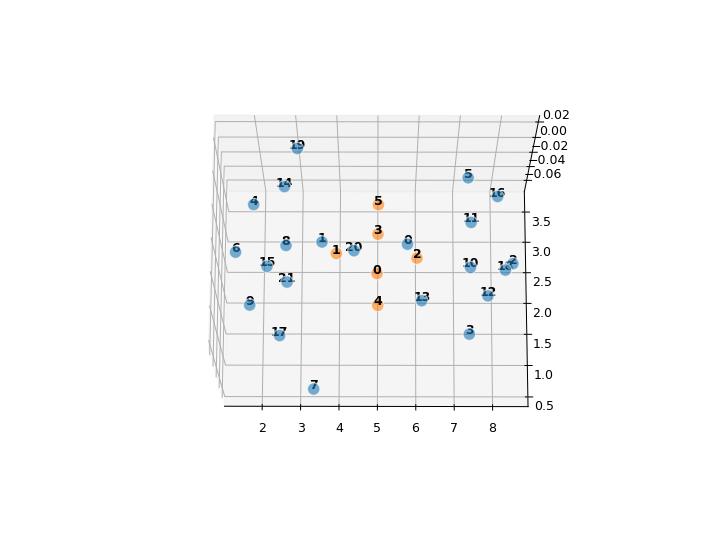

In [36]:
cm_agglomeratve_df
vis_3d_clusters(ds,cm_agglomeratve_df,100,True)

In [112]:
# Agg_clusters.n_clusters_
# Agg_clusters_label = Agg_clusters.labels_
# centroid = clf.centroids_
# clf.classes_
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(*centroid.T, s=100, alpha=0.6, edgecolors='w',color=colors[Agg_clusters.labels_])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

# HDBSCAN

<IPython.core.display.Javascript object>


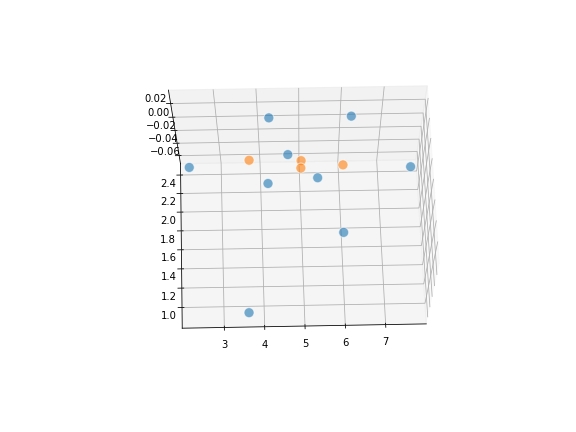

In [283]:
import hdbscan
cm_hdbscan = hdbscan.HDBSCAN(alpha=1.0,min_cluster_size=3)
cm_hdbscan_df = cm_methonds(cm_hdbscan,ds)
vis_3d_clusters(ds,cm_hdbscan_df)

# DBSCAN

<IPython.core.display.Javascript object>


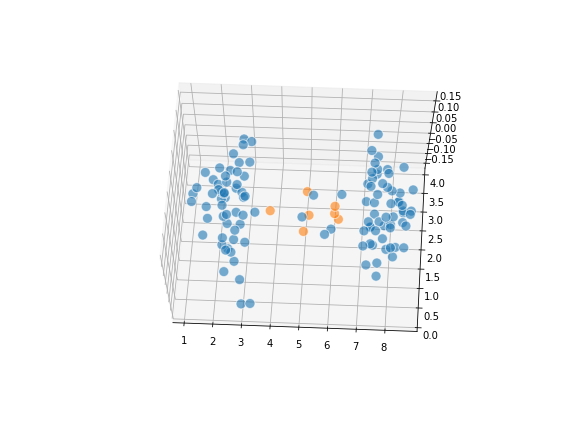

In [256]:
from sklearn.cluster import DBSCAN
cm_dbscan = DBSCAN(eps=0.1,min_samples=2) #0.1-0.4 有类
cm_dbscan_df = cm_methonds(cm_dbscan,ds)
vis_3d_clusters(ds,cm_dbscan_df)

In [246]:
cm_dbscan = DBSCAN(eps=1,min_samples=2)
X = ds.df[ds.feature_cols].values
# label = ds.label_col
# y = ds.df[label]
# cluster_label = y.unique()
# newDf = pd.DataFrame(columns=ds.df.columns)
# for i in cluster_label:
#     tmpDf = pd.DataFrame(columns=ds.df.columns)
#     feature_col = ds.feature_cols
#     label = ds.label_col
#     cluster_X = df[df[label]==i][feature_col].values
#     sub_clusters = cm_dbscan.fit(cluster_X)
# #     sub_clusters.n_clusters_
#     sub_clusters.labels_
#     cluster_X.shape
#     clf = NearestCentroid()
#     clf.fit(cluster_X,sub_clusters.labels_)
#     centroid = clf.centroids_
#     tmpDf[label] = i
#     tmpDf[feature_col] = centroid
#     tmpDf[label] = i
# #     centroid
#     newDf = newDf.append(tmpDf)
# #     newDf
# #     sub_clusters_centroid = clf.centroids_
# newDf.shape

(940, 3)

array([  0,   1,  -1,   2,   3,   4,   1,   5,  -1,   6,   7,  -1,  -1,
         1,  -1,   6,  -1,  -1,  -1,  -1,   8,   4,  -1,   9,  -1,  -1,
        -1,  -1,  -1,  -1,  10,  -1,  -1,  11,  12,  -1,  13,  14,   2,
        15,  -1,  -1,  16,  17,  -1,  18,  -1,  -1,   5,   0,  19,  20,
        -1,  -1,  -1,  -1,  -1,  -1,  13,  18,  -1,  21,  -1,  -1,  -1,
        -1,  -1,  -1,  13,  -1,   9,  -1,  22,  23,  24,  -1,  -1,  -1,
        25,  -1,  26,  27,  28,  -1,  -1,  -1,   9,  -1,  -1,  29,  17,
        -1,  -1,  -1,   2,  -1,  -1,  30,   2,  -1,  31,  14,  -1,   6,
        -1,  -1,  -1,  -1,  32,  -1,  -1,  -1,  -1,  32,  33,  -1,  23,
        21,  24,  34,  -1,  -1,  -1,  -1,  13,  19,  35,  -1,  -1,  36,
        -1,  28,  10,   5,  -1,  36,  -1,  37,  -1,  -1,  -1,  -1,   2,
        12,  38,  -1,  15,  39,  -1,  15,  40,  41,  37,  42,   9,  -1,
        40,   8,   5,  24,   0,  -1,  37,  -1,   5,  -1,  16,  30,  43,
        -1,  22,   3,  10,  -1,  -1,   9,   0,   7,  -1,  -1,  -

# Compare Different Cluster Algorithum In 3D Hourglass

In [200]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.cluster import Birch

cm_hdbscan = hdbscan.HDBSCAN()
cm_dbscan = DBSCAN(eps=100)
cm_agglomerative = AgglomerativeClustering(n_clusters=None,distance_threshold=1)

X = ds.df[ds.feature_cols].values
cm_birch = Birch(threshold=0.1, n_clusters=None, branching_factor=None)
cluster_algorithums = [("HDBSCAN",cm_hdbscan),("DBSCAN",cm_dbscan),("Agglomerative",cm_agglomerative),("Birch",cm_birch)]

for name, algorithm in cluster_algorithums:
     

Birch(branching_factor=1, n_clusters=None, threshold=0.1)

In [99]:
blobs_cp.voronoiPoints

array([[-6.094667 ,  8.8258   ],
       [-5.501627 ,  7.8903775],
       [-7.8536444,  8.10002  ],
       [-4.459698 ,  6.6718297]], dtype=float32)

In [10]:
tmpContour = blobs_cp._get_contour_df()   
#get_contour_df() 返回的是给每个点加了4个margin的countour 包围圈的点数 为(130,3) anchor点为(26,3)
# tmpAnchors = blobs_cp.low_dim_anchors #(26,3)
tmpContour

,x,y,label
0,-10.391458,7.120960,0
1,-9.990088,4.205771,0
2,-10.336825,5.580200,0
3,-9.228407,6.161299,0
4,-7.925725,5.587150,0
...,...,...,...
125,-9.256233,8.772457,0
126,-6.094667,8.824800,1
127,-5.501627,7.889378,1
128,-7.853644,8.099020,1


[0.8, 0.8]

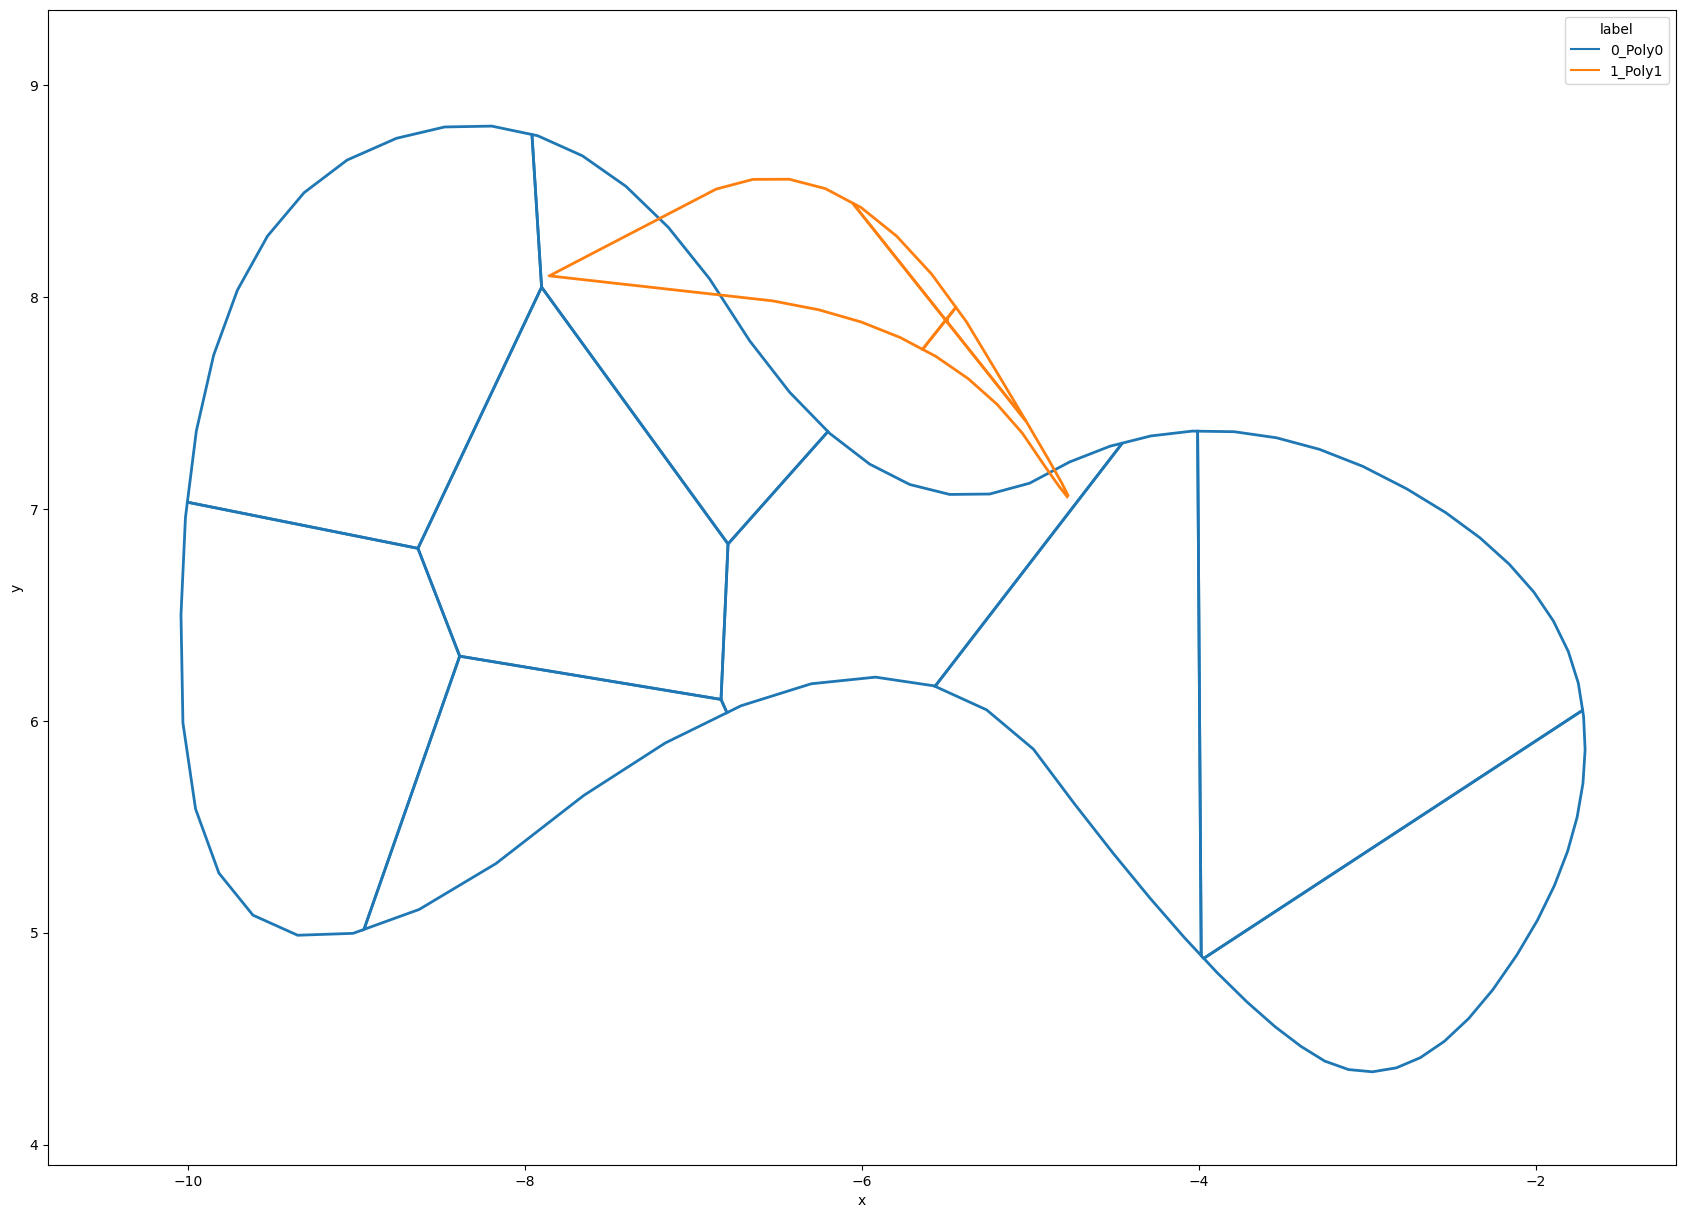

In [11]:
blobs_cp._pebble_voronio_plot(alpha=1)
blobs_cp.alpha

blobs_cp._cluster_plot_set_sns(2,show_points=True)

**3、  self.anchors_indices = [i for i in range(len(self.y_with_centroids) - len(self.intra_class_anchors_labels),
                                                 len(self.y_with_centroids))]**

In [ ]:
blobs_cp.y_with_centroids.shape

In [ ]:
blobs_cp.clusters

In [ ]:
for x1, x2 in zip(edges_x1, edges_x2):
    anchor_x1 = blobs_cp._sample_index_to_anchor(blobs_cp.y_with_centroids[x1], blobs_cp.clusters[x1])
    anchor_x2 = blobs_cp._sample_index_to_anchor(blobs_cp.y_with_centroids[x2], blobs_cp.clusters[x2])
    print(x1, x2)
    print(f"anchor1_x1:{anchor_x1}, anchor_x2:{anchor_x2}")
    blobs_cp.inter_class_relations[anchor_x1][anchor_x2] += 1
    blobs_cp.inter_class_relations_label_level[blobs_cp.y_with_centroids[x1]][blobs_cp.y_with_centroids[x2]] += 1

In [ ]:
 def _sample_index_to_anchor(self, label, cluster):
        """
        Convert sample index to anchor index
        :param label: label of sample
        :param cluster: sub-cluster of sample
        :return: anchor index
        """
        anchor_index = 0
        for i in range(label):
            anchor_index += self.num_clusters_each_label[i]
        anchor_index += cluster
        return anchor_index

In [ ]:
blobs_cp.num_clusters_each_label #高维数据的子类别，label 1有22, label 2有4

In [ ]:
blobs_cp.clusters #(966,) 高维空间中的点的子类别[0, 1, 2,....]一共有22+2个子类别

self._calc_proximity_matrix('high')

输入:dim (High,none)-> 高维数据intra_class_anchors和低维数据low_dim_anchors

In [ ]:
blobs_cp.intra_class_anchors_labels

**6、 self._dim_reduction()**

输入:None, 输出:None,   
中间变量: self.dim_reduction_algo=[t-sne,umap...]

## 添加点形成小的margin的方法   

In [ ]:
blobs_cp.uniform_points_per
blobs_cp.reduce_all_points

In [ ]:
blobs_cp.low_dim_points, #(966,2)带有anchor点的数据降维  
blobs_cp.low_dim_anchors.shape  #(26,2) 只有anchor点的数据降维

**self._get_contour_df()**  
 Add points with small margin before concave hull calculation to avoid anchors on the edges  
 :return: pandas Dataframe with all points

In [ ]:
blobs_cp._get_contour_df()  # 返回 低维度(130,3)的矩阵，原anchor点是(26,3),分别在每个anchor点的上下左右加了四个点，形成了(130,3)
blobs_cp.low_dim_anchors # 降维后的anchors二维坐标 
blobs_cp.anchors_radius #存储的是每个anchor的圆心 anchor采用birch算法聚类，采用KNN算法建立邻接图并算出类之间的关系

In [ ]:
blobs_cp.intra_class_anchors_labels
blobs_cp.uniform_points_per

## 生成凸包的过程

In [ ]:
blobs_cp.anchor_voronoi_regions_label

## _get_concave_hull

In [ ]:
blobs_cp.uniform_points_per

In [ ]:
blobs_cp.anchor_voronoi_regions  
blobs_cp.anchor_voronoi_regions_label

**7、 self._relaxation()**

1、计算低维的类之间的关系和接近程度  
for i in range(self.n_iter):
    self._calc_low_dim_inter_class_relations()
    self._calc_proximity_matrix('low')  
2、屏蔽掉同label的子类之间的关系  
3、计算loss   -self.loss_func()
4、


In [ ]:
blobs_cp._cluster_plot_set_sns(1,figsize=blobs_cp.figsize,
                                           show_blobs=blobs_cp.show_blobs,
                                           show_points=blobs_cp.show_points,
                                           show_anchors=blobs_cp.show_anchors,
                                           show_anchors_annotation=blobs_cp.show_anchors_annotation,
                                           show_inner_blobs=blobs_cp.show_inner_blobs,
                                           douglas_peucker_tolerance=blobs_cp.douglas_peucker_tolerance,
                                           smooth_iter=blobs_cp.smooth_iter,
                                           show_label_level_plots=False,
                                           show_anchor_level_plot=False,
                                           show_loss_plot=False,
                                           default_max_val=blobs_cp.default_max_val,
                                           mat_figsize=blobs_cp.mat_figsize,
                                           mat_annot_kws_size=blobs_cp.mat_annot_kws_size,
                                           mat_label_size=blobs_cp.mat_label_size)

**8、 return self.low_dim_anchors**

In [ ]:
blobs_cp.anchors_indices

blobs_cp.dbg_df #原始高维数据

In [ ]:
low_dim_blobs_cp.shape #低维空间anchor点及其坐标 （26，2） 点的数量和维度

In [ ]:
# blobs_cp.intra_class_anchors.shape #高维空间中的anchor点
len(blobs_cp.intra_class_anchors_labels) #高维空间中的anchor标签 0表示第一个类的 1表示第二个类的

In [ ]:
blobs_cp.num_clusters_each_label #表示两个label分别有22类和4类

In [ ]:
blobs_cp.intra_class_anchors_labels
blobs_cp.intra_class_anchors.shape #生成的26个三维anchor点
blobs_cp.clusters[0:10] #子类聚类结果标签 966个数据点包含26个anchor的标签信息
blobs_cp.anchors_density #高维空间中点的子类的个数
blobs_cp.anchors_radius #高维空间中每个子类的anchor半径1

In [ ]:
# 
blobs_cp.y_with_centroids.shape

In [ ]:
blobs_cp.anchors_indices

In [ ]:
blobs_cp.knng.toarray() #(966,966) 存储distance matrix

In [ ]:
for x1,x2 in zip(edges_x1.shape,edges_x2.shape):
    x1

In [ ]:
blobs_cp.knng.toarray().shape

In [ ]:
blobs_cp.low_dim_anchors.shape
blobs_cp.intra_class_anchors.shape
blobs_cp.high_dim_proximity_matrix
blobs_cp.low_dim_proximity_matrix

In [ ]:
blobs_cp.inter_class_relations.shape
blobs_cp.inter_class_relations_label_level

In [ ]:
blobs_cp.knng.toarray().nonzero()

# _cal_inter_class_relations
**inter_class_relations_label_level** 存储的是label维度的关系(2,2)矩阵

In [ ]:
blobs_cp.inter_class_relations.shape #存储的是高维空间anchor点的矩阵

In [ ]:
blobs_cp.inter_class_relations_label_level.shape